In [1]:
import pandas as pd
import numpy as np

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력 default:60

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud

In [4]:
# 정규표현식
import re

In [5]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [6]:
import matplotlib.font_manager as fm
# 원하는 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf" # 예시 경로
font_prop = fm.FontProperties(fname=font_path)

plt.rc('font', family=font_prop.get_name())

In [7]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-07 13:49:56.956518


'2025-01-07'

In [8]:
df = pd.read_csv(f'../stock/news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_갯수,내용_토큰_갯수,제목_명사,내용_명사
0,매일경제,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓","\n 사진 확대 삼성SDI 기흥사업장. [사진 = 삼성SDI] DS투자증권은 7일 삼성SDI에 대해 지난해 4분기 일회성 비용이 반영되면서 영업손실이 예상된다며 목표주가를 기존 52만원에서 39만원으로 하향 조정했다. 다만 투자의견은 ‘매수’를 유지했다.삼성SDI의 4분기 영업손실은 233억원으로 전년동기대비 적자전환하며 컨센서스(증권사 전망치 평균)를 하회할 것으로 전망했다. 같은 기간 매출액은 31.8% 감소한 3조8000억원으로 추정했다.중대형전지는 주요 고객사 부진으로 전분기 수준의 드론·친환경차(xEV) 출하량이 예상된다고 설명했다. 에너지저장장치(ESS) 호조는 지속돼 중대형전지 출하량 성장을 견인할 것으로 봤다. 소형전지는 리비안 물량 부재 외에도 전동공구와 IT향도 부진하며 출하량이 감소할 것으로 예상했다.여기에 일회성 비용 인식으로 중대형전지를 중심으로 마진율을 하향했다는 설명이다. 일회성 비용은 재고평가손실과 품질충당보증금 설정 등에 따라 약 1000억원 발생할 것으로 전망했다.삼성SDI의 고객사인 리비안이 올해 미국 인플레이션감축법(IRA) 보조금 대상 차종에서 제외된 점도 부담 요인으로 꼽았다. 3750달러 보조금의 부재는 리비안의 가격 경쟁력에 큰 부담이 될 전망이다. 원통형 전지 주 고객사가 리비안인 점을 감안하면 소형전지 출하량 회복이 지연될 수밖에 없다고 짚었다.최태용 DS투자증권 연구원은 “소형전지 중심으로 가동률 회복이 지연된 점을 반영해 실적 추정치를 하향했다”며 “트럼프 대통령 당선으로 업황 위축이 가시화하고 있다”고 말했다.최 연구원은 “첨단제조생산세액공제(AMPC)를 포함한 IRA 보조금 폐지 가능성은 불확실하지만, 예산 감축을 위한 보조금 축소는 예상 가능한 범위”라며 “전방 시장 둔화는 불가피하나 경쟁사 대비 AMPC 의존도가 낮은 점은 오히려 장점으로 부각될 수 있다”고 덧붙였다.\n",2025-01-07 08:25:11,36,932,7,185,삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,사진 확대 삼성 기흥 사업 사진 삼성 투자 증권 삼성 대해 지난해 회 비용 반영 영업 손실 예상 목표 주가 기존 하향 조정 다만 투자 의견 매수 를 유지 삼성 의 영업 손실 년 대비 컨센서스 증권사 망치 평균 를 회 것 전망 기간 매출 액 감소 추정 중대 전지 주요 고객 사 부진 분기 수준 드론 친환 경차 하량 예상 설명 에너지 저장장치 호조 지속 중대 전지 하량 성장 견인 것 소형 전지 리 물량 부재 외 공구 향 하량 감소 것 예상 여기 회 비용 인식 중대 전지 중심 마진 율 하향 설명 회 비용 재고 평가 손실 품질 충당 보증금 설정 등 약 발생 것 전망 삼성 의 고객 사인 리비 안이 올해 미국 인플레이션 감축 법 보조금 대상 차종 제외 점도 부담 요인 꼽았다 보조금 부재 리 가격 경쟁력 부담 전망 원통 전지 주 고객 사가 리 점 감안 소형 전지 하량 회복 지연 수 최태용 투자 증권 연구원 소형 전지 중심 가동 률 회복 지연 점 반영 실적 추정 하향 며 트럼프 대통령 당선 업황 위축 가시 고 말 최 연구원 첨단 생산 세액 공제 를 포함 보조금 폐지 가능성 예산 감축 위 보조금 축소 예상 범위 라며 전방 시장 둔화 경쟁 사 대비 의존 도 점 오히려 장점 부각 수 고


In [32]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
아레 세 탭 쓰시며ㅓㄴ됩니

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [10]:
cvect = CountVectorizer()
cvect_dtm = cvect.fit_transform(df['제목_명사'])
cvect_dtm

<100x413 sparse matrix of type '<class 'numpy.int64'>'
	with 643 stored elements in Compressed Sparse Row format>

In [11]:
tvect = TfidfVectorizer()
tvect_dtm = tvect.fit_transform(df['제목_명사'])
tvect_dtm

<100x413 sparse matrix of type '<class 'numpy.float64'>'
	with 643 stored elements in Compressed Sparse Row format>

In [12]:
# 코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity?

In [14]:
cosine_matrix = cosine_similarity(tvect_dtm, tvect_dtm)
cosine_matrix

array([[1.        , 0.25463402, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25463402, 1.        , 0.        , ..., 0.        , 0.23939242,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.23939242, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [15]:
cosine_matrix.shape

(100, 100)

<Axes: >

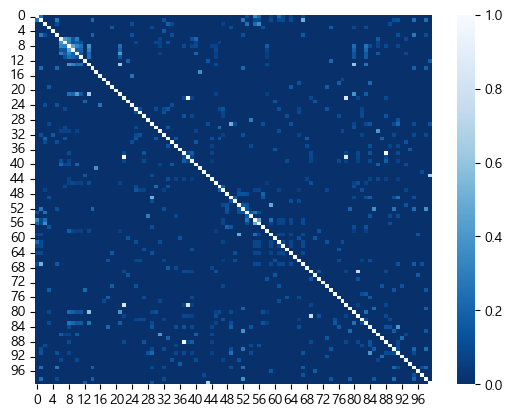

In [19]:
sns.heatmap(cosine_matrix, cmap='Blues_r')

In [20]:
df.shape, cosine_matrix.shape

((100, 10), (100, 100))

In [24]:
pd.DataFrame(cosine_matrix).style.background_gradient(cmap='Blues_r')

In [26]:
# 첫번째 문서와 유사도가 높은 문서 상위 10개 추출
pd.DataFrame(cosine_matrix).loc[0].nlargest(10)

0     1.000000
55    0.332334
1     0.254634
61    0.211001
56    0.202070
53    0.119738
67    0.091621
64    0.078508
62    0.075425
59    0.074012
Name: 0, dtype: float64

In [28]:
df_cosine = df[['제목','제목_명사']].copy()
df_cosine['유사도_0'] = pd.DataFrame(cosine_matrix)[0]
df_cosine.nlargest(10, columns='유사도_0')

,제목,제목_명사,유사도_0
0,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓",삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,1.000000
55,"""네이버, 4분기 실적 컨센서스 웃돌 전망…목표가↑""-한화",네이버 분기 실적 컨 센서스 전망 목표 한화,0.332334
1,"“수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑",수요 회복 예상 만 닉스 하이닉스 목표,0.254634
61,"""삼성SDI, 트럼프 재선으로 2차전지 업황 위축 가시화…목표가↓""-DS",삼성 트럼프 재선 차 전지 업 황 위축 가시 목표,0.211001
56,"""천보, 올해 실적 컨센서스 밑돌 전망…목표가↓""-키움",천보 올해 실적 컨 센서스 밑돌 전망 목표,0.202070
53,"""삼성전자, 박스권 돌파할 재료 없어…4분기 실적 부진할 것""-신한",삼성전자 박스 돌파 재료 분기 실적 부진 것 신,0.119738
67,"""SK하이닉스, AI 수요 강세에 HBM 호황…목표가↑""-BNK",하이닉스 수요 강세 호황 목표,0.091621
64,"""코스메카코리아, 너무 높았던 기대엔 못 미칠 것…목표가↓""-하나",코스 메카 코리아 기대 것 목표 하나,0.078508
62,"""크래프톤, 운영능력 바탕의 PUBG 성장 이어져…목표가↑""-KB",크 래프 톤 운영 능력 바탕 성장 목표,0.075425
59,"""코웨이, 주주환원율 상향 발표…목표가↑""-한화",코웨이 주주 환원 상향 발표 목표 한화,0.074012


In [29]:
# 0번 문서와 유사도가 낮은 순
df_cosine.nsmallest(10,'유사도_0')

,제목,제목_명사,유사도_0
2,"“휠라홀딩스, 부진은 지난해까지만…올해 실적·주가 반등 전망”",휠라 홀딩스 부진 지난해 올해 실적 주가 반 등 전망,0.0
3,"“주식 리포트, 그래도 여긴 볼 만 하네”…9년 연속 리서치 1등 증권사는?",주식 리포트 여긴 만 년 연속 리서치 등 증권사,0.0
4,AI 빅뱅 타고 텐배거 노린다···캐나다산 핵발전株 카메코[매일 돈이 보이는 습관 M+],빅뱅 텐 배 거 캐나다 핵 발전 株 카 메코 매일 돈 습관,0.0
5,"“최태원·젠슨황 만날까”…날개 단 SK하이닉스 주가, 20만닉스로 훨훨",최태원 젠슨황 날개 하이닉스 주가 만 닉스,0.0
6,[단독] “글로벌 큰손 국민연금 이 정도야”…해외 기업에도 제목소리 낸다,단독 글로벌 큰손 국민연금 정도 해외 기업 목소리,0.0
7,"[단독] “이봐, 문제는 수익률이야”…요즘 기업 주총장서 가장 목소리 크다는 이 큰손",단독 문제 수익 요즘 기업 주총 장서 목소리 큰손,0.0
8,[단독] “전 국민 노후가 달려있는데”…투자기업에 목소리 키우는 국민연금,단독 국민 노후 투자 기업 목소리 국민 연금,0.0
9,국민연금 목소리 커졌다 의결권행사 4년새 5배로,국민 연금 목소리 의결권 행사 년 새 배,0.0
10,"'글로벌 큰손' 국민연금, 지분 보유한 외국기업에도 영향력 늘린다",글로벌 큰손 국민 연금 지분 보유 외국 기업 영향력,0.0
11,주총 존재감 커진 국민연금 과도한 대주주 전횡 막는다,주총 존재감 국민 연금 과도 대주주 전횡,0.0


#### 유사도가 높은 문서 찾는 함수 만들기

In [30]:
def find_similarity(idx, n=10) :
    ''' 유사도가 높은 문서를 반환 '''
    df_cosine = df[['제목','제목_명사']].copy()
    df_cosine[f'유사도_{idx}'] = pd.DataFrame(cosine_matrix)[idx]
    return df_cosine.nlargest(n, columns=f'유사도_{idx}')

In [31]:
find_similarity(1)

,제목,제목_명사,유사도_1
1,"“수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑",수요 회복 예상 만 닉스 하이닉스 목표,1.000000
67,"""SK하이닉스, AI 수요 강세에 HBM 호황…목표가↑""-BNK",하이닉스 수요 강세 호황 목표,0.514861
5,"“최태원·젠슨황 만날까”…날개 단 SK하이닉스 주가, 20만닉스로 훨훨",최태원 젠슨황 날개 하이닉스 주가 만 닉스,0.283436
52,"코스피, 외국인 매수세에 2500선 돌파…'20만닉스' 회복",코스피 외국인 매수세 선 돌파 만 닉스 회복,0.275088
0,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓",삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,0.254634
95,CES 젠슨황 연설 앞두고 반도체주 강세…'19만닉스' 회복 시도,젠슨황 연설 반도체 주 강세 만 닉스 회복 시도,0.244246
98,"코스피, 개인 매수에 강보합 출발…'19만닉스' 회복할까",코스피 개인 매수 강보합 출발 만 닉스 회복,0.239392
14,"""MS 고마워"" … 다시 '20만닉스' 눈앞",만 닉스 눈앞,0.225303
91,[마켓PRO]'하이닉스·삼전 팔고 한미반도체로'…투자 고수들의 선택,마켓 하이닉스 삼전 한미 반도체 투자 고수 선택,0.138007
32,비트코인 9만9000달러 회복···올들어 6% 상승[매일코인],비트코인 만 달러 회복 상승 매일 코인,0.126264


In [43]:
ed_similarity = euclidean_distances(tvect_dtm,tvect_dtm)

In [44]:
# 최소, 최대값 확인
ed_similarity.min(), ed_similarity.max()

(0.0, 1.4142135623730951)

In [45]:
ed_matrix = 1 - (ed_similarity / ed_similarity.max())

<Axes: >

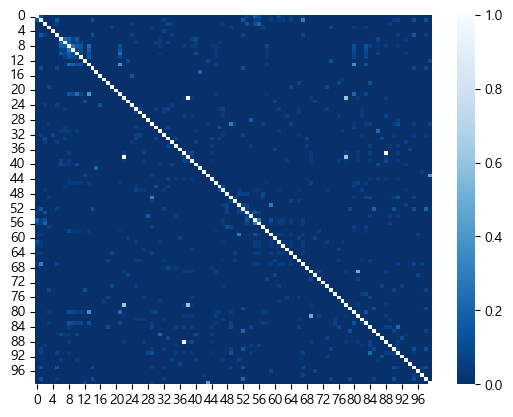

In [46]:
# 높은게 유사도가 높음
sns.heatmap(ed_matrix, cmap='Blues_r')

#### 유사도가 높은 문서 찾는 함수 만들기 by 유클리드 거리

In [47]:
def find_ed_similarity(idx, n=10) :
    ''' 유사도가 높은 문서를 반환 '''
    df_ed = df[['제목','제목_명사']].copy()
    df_ed[f'유사도_{idx}'] = pd.DataFrame(ed_matrix)[idx]
    return df_ed.nlargest(n, columns=f'유사도_{idx}')

In [48]:
find_ed_similarity(0)

,제목,제목_명사,유사도_0
0,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓",삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,1.000000
55,"""네이버, 4분기 실적 컨센서스 웃돌 전망…목표가↑""-한화",네이버 분기 실적 컨 센서스 전망 목표 한화,0.182891
1,"“수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑",수요 회복 예상 만 닉스 하이닉스 목표,0.136654
61,"""삼성SDI, 트럼프 재선으로 2차전지 업황 위축 가시화…목표가↓""-DS",삼성 트럼프 재선 차 전지 업 황 위축 가시 목표,0.111744
56,"""천보, 올해 실적 컨센서스 밑돌 전망…목표가↓""-키움",천보 올해 실적 컨 센서스 밑돌 전망 목표,0.106731
53,"""삼성전자, 박스권 돌파할 재료 없어…4분기 실적 부진할 것""-신한",삼성전자 박스 돌파 재료 분기 실적 부진 것 신,0.061777
67,"""SK하이닉스, AI 수요 강세에 HBM 호황…목표가↑""-BNK",하이닉스 수요 강세 호황 목표,0.046911
64,"""코스메카코리아, 너무 높았던 기대엔 못 미칠 것…목표가↓""-하나",코스 메카 코리아 기대 것 목표 하나,0.040056
62,"""크래프톤, 운영능력 바탕의 PUBG 성장 이어져…목표가↑""-KB",크 래프 톤 운영 능력 바탕 성장 목표,0.038452
59,"""코웨이, 주주환원율 상향 발표…목표가↑""-한화",코웨이 주주 환원 상향 발표 목표 한화,0.037718


#### 자카드 유사도

In [49]:
from sklearn.metrics.pairwise import pairwise_distances

In [50]:
pairwise_distances?

Signature:
pairwise_distances(
    X,
    Y=None,
    metric='euclidean',
    *,
    n_jobs=None,
    force_all_finite=True,
    **kwds,
)
Docstring:
Compute the distance matrix from a vector array X and optional Y.

This method takes either a vector array or a distance matrix, and returns
a distance matrix.
If the input is a vector array, the distances are computed.
If the input is a distances matrix, it is returned instead.
If the input is a collection of non-numeric data (e.g. a list of strings or a
boolean array), a custom metric must be passed.

This method provides a safe way to take a distance matrix as input, while
preserving compatibility with many other algorithms that take a vector
array.

If Y is given (default is None), then the returned matrix is the pairwise
distance between the arrays from both X and Y.

Valid values for metric are:

- From scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
  'manhattan']. These metrics support sparse matrix
  inputs.
  ['na

In [62]:
jd_similarity = pairwise_distances(tvect_dtm.toarray(),tvect_dtm.toarray(), metric='jaccard')
jd_similarity

D:\kdt\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.83333333, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.83333333, 0.        , 1.        , ..., 1.        , 0.81818182,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.81818182, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [63]:
jd_similarity.min(), jd_similarity.max()

(0.0, 1.0)

<Axes: >

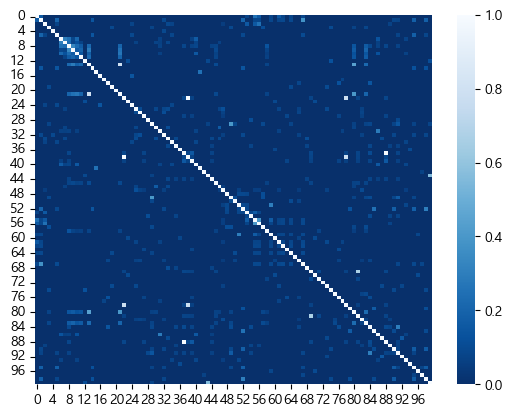

In [65]:
sns.heatmap(1 - jd_similarity, cmap='Blues_r')